Authors: Connor Marrs and Trent Rabe 
The first bit of code handles the special case of the Gaussian Free Field on
the circle with $s=\frac{1}{2}$, which is actually a Brownian Bridge.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

This program simulates the Gaussian Free Field on the circle
given by

$$
  X_s(\theta) \triangleq \sum_{n=1}^\infty \frac{\sin(n\theta)}{n^{2s}}Z_n
$$

where $\{Z_n\}_{n=1}^\infty$ is a sequence of i.i.d standard Gaussians
provided that $s>\frac{1}{4}$.

In [2]:
# compute the nth partial sum of X_s(\theta)
def gff_partial_sum(Z,n,s,t):
    # construct a random vector of i.i.d standard normals of size n
    

    # construct a vector of the coefficients of the sum
#     coeff = [(np.sin(m*t) + np.cos(m *t))/m**(2*s) for m in range(1,n+1)]
    coeff = [np.sin(m*t)/m**(2*s) for m in range(1,n+1)]


#     print(Z)
    return Z.dot(coeff)

# plot the various values
theta1 = np.arange(0,np.pi,0.01) # time grid
numterms = 50 # number of terms in partial sum
Zs = np.random.default_rng().normal(0, 1, numterms)
s = .5 # s value

vals1 = np.array(
    [gff_partial_sum(Zs,numterms, s,t) for t in theta1]
)

vals = np.append(vals1,-vals1)

theta =  np.append(theta1, -theta1)
# for i in range(len(theta)):
#     theta +=(-1 *theta[i])
# for j in range(len(vals)):
#     vals +=(-1 *vals[i])

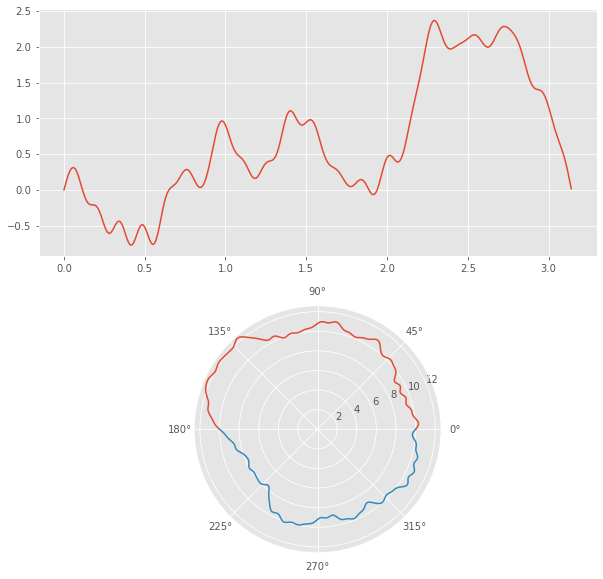

In [3]:
# Plotting the GFF on two axes - both polar and normal.
# %matplotlib widget
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, projection='polar')

ax1.plot(theta1,vals1)
ax2.plot(theta1,10 +vals1)
ax2.plot(-theta1,10-vals1)
plt.show()


<IPython.core.display.Javascript object>


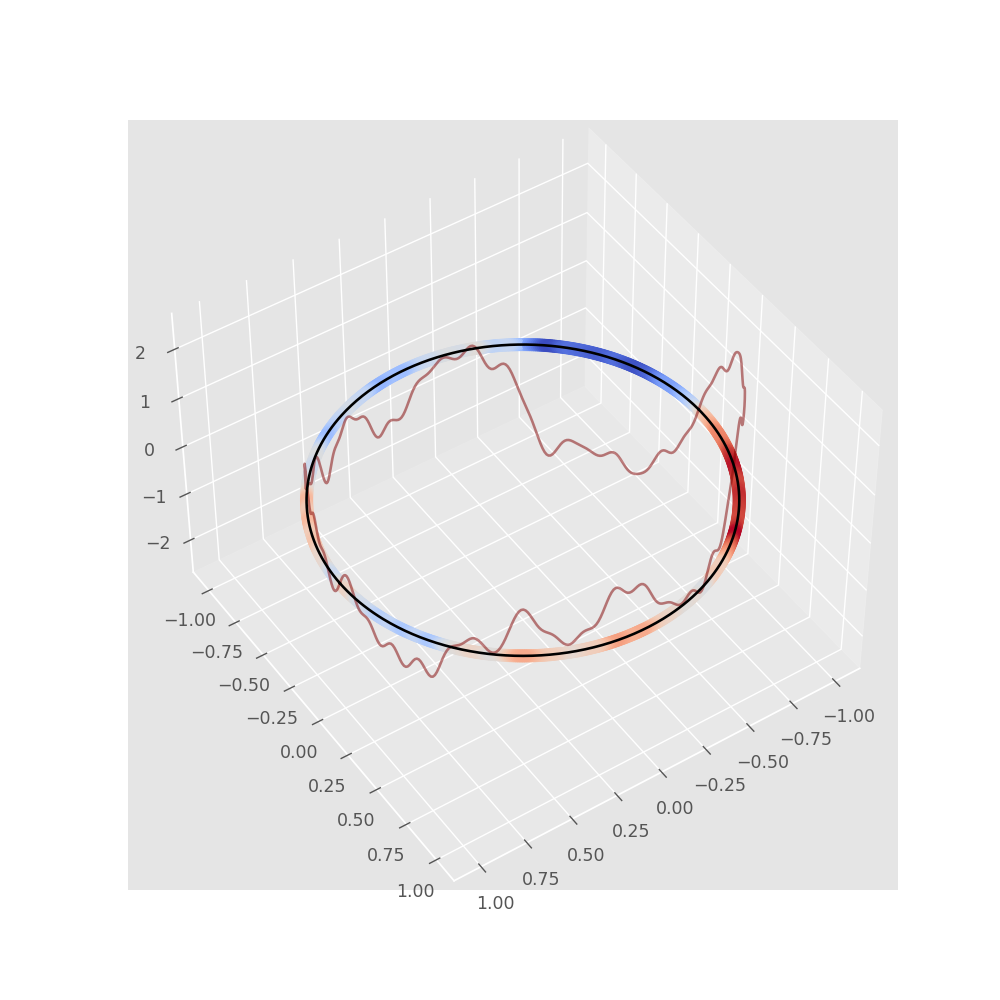

630


In [4]:
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.view_init(60, 35)


# Data for a three-dimensional line

ax.plot3D(np.cos(theta1), np.sin(theta1), vals1, alpha = 0.5, c = 'maroon')
ax.plot3D(np.cos(-theta1), np.sin(-theta1), -vals1, alpha = 0.5, c = 'maroon')
ax.scatter3D(np.cos(theta), np.sin(theta), vals*0, cmap = 'coolwarm', c = vals, alpha = 1, s = 50)
# ax.scatter3D(np.cos(-theta), np.sin(-theta), -vals, cmap = 'hot', c = -vals, alpha = 1)
ax.plot3D(np.cos(theta1), np.sin(theta1), 0*theta1, 'black')
ax.plot3D(np.cos(-theta1), np.sin(-theta1), 0*theta1, 'black')

plt.show()

In [18]:
# %matplotlib notebook

# fig = plt.figure(figsize=(8,8))
# ax = plt.axes(projection='3d')
# ax.view_init(60, 35)


# # Data for a three-dimensional line

# for i in range(315):
#     ax.plot3D(np.cos(theta[i-1:i+1]), np.sin(theta[i -1:i+1]), vals[i-1:i+1], c = plt.cm.jet(1. * i / 315))
#     ax.plot3D(np.cos(-theta[i-1:i+1]), np.sin(-theta[i-1:i+1]), -vals[i-1:i+1],c = plt.cm.jet(1. * i / 315))
# ax.plot3D(np.cos(theta1), np.sin(theta1), 0*theta1, 'black')
# ax.plot3D(np.cos(-theta1), np.sin(-theta1), 0*theta1, 'black')

# print(len(vals))

# plt.show()